In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/ninocaduff/Data-Science-Fundamentals-Project/main/data/merged_with_dummies.csv")

# df = pd.read_csv('/Users/fredericksafian/VSCODE/finaldata/merged_with_dummies.csv')

In [6]:
# Checking for missing values in the target variable 'NO2_tomorrow'

missing_values_target = df['NO2_tomorrow'].isnull().sum() #revealed 708 missing values, we will delete these rows
df = df.dropna(subset=['NO2_tomorrow'])

In [7]:
# Checking for columns with a high percentage of missing values

missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

#columns with more than 10% missing values
columns_high_missing_values = missing_values_percentage[missing_values_percentage > 10].sort_values(ascending=False)

columns_high_missing_values

SO2       64.716781
StrGlo    64.663843
CO        64.637374
PN        49.523557
PM2.5     46.797247
WVs       35.477325
dtype: float64

In [8]:
# we will drop these above (and just below) 50% for sure

columns_to_drop = ['SO2', 'StrGlo', 'CO', 'PN']
df = df.drop(columns=columns_to_drop)

## Missing Value Handling

Below we take a look at how we should handle the remaining missing values.

First we observe how many missing values there are in each column.

In [31]:
# Count the number of missing values in each column
missing_count_per_column = df.isna().sum()

# Filter columns with missing values
columns_with_missing_values = missing_count_per_column[missing_count_per_column > 0]

# Display the count of missing values for columns with missing values
print(columns_with_missing_values)


NO                24
NO2               24
NOx               24
O3                90
O3_max_h1         94
O3_nb_h1>120      94
PM10             269
PM2.5           5304
RainDur           25
T                 80
T_max_h1          84
p                 35
WD               598
WVv              598
WVs             4021
Hr               123
dtype: int64


We observe that there are a total of 16 columns that contain missing values.
We plot a histogram of each of the 16 columns to observe the distribution of the data.

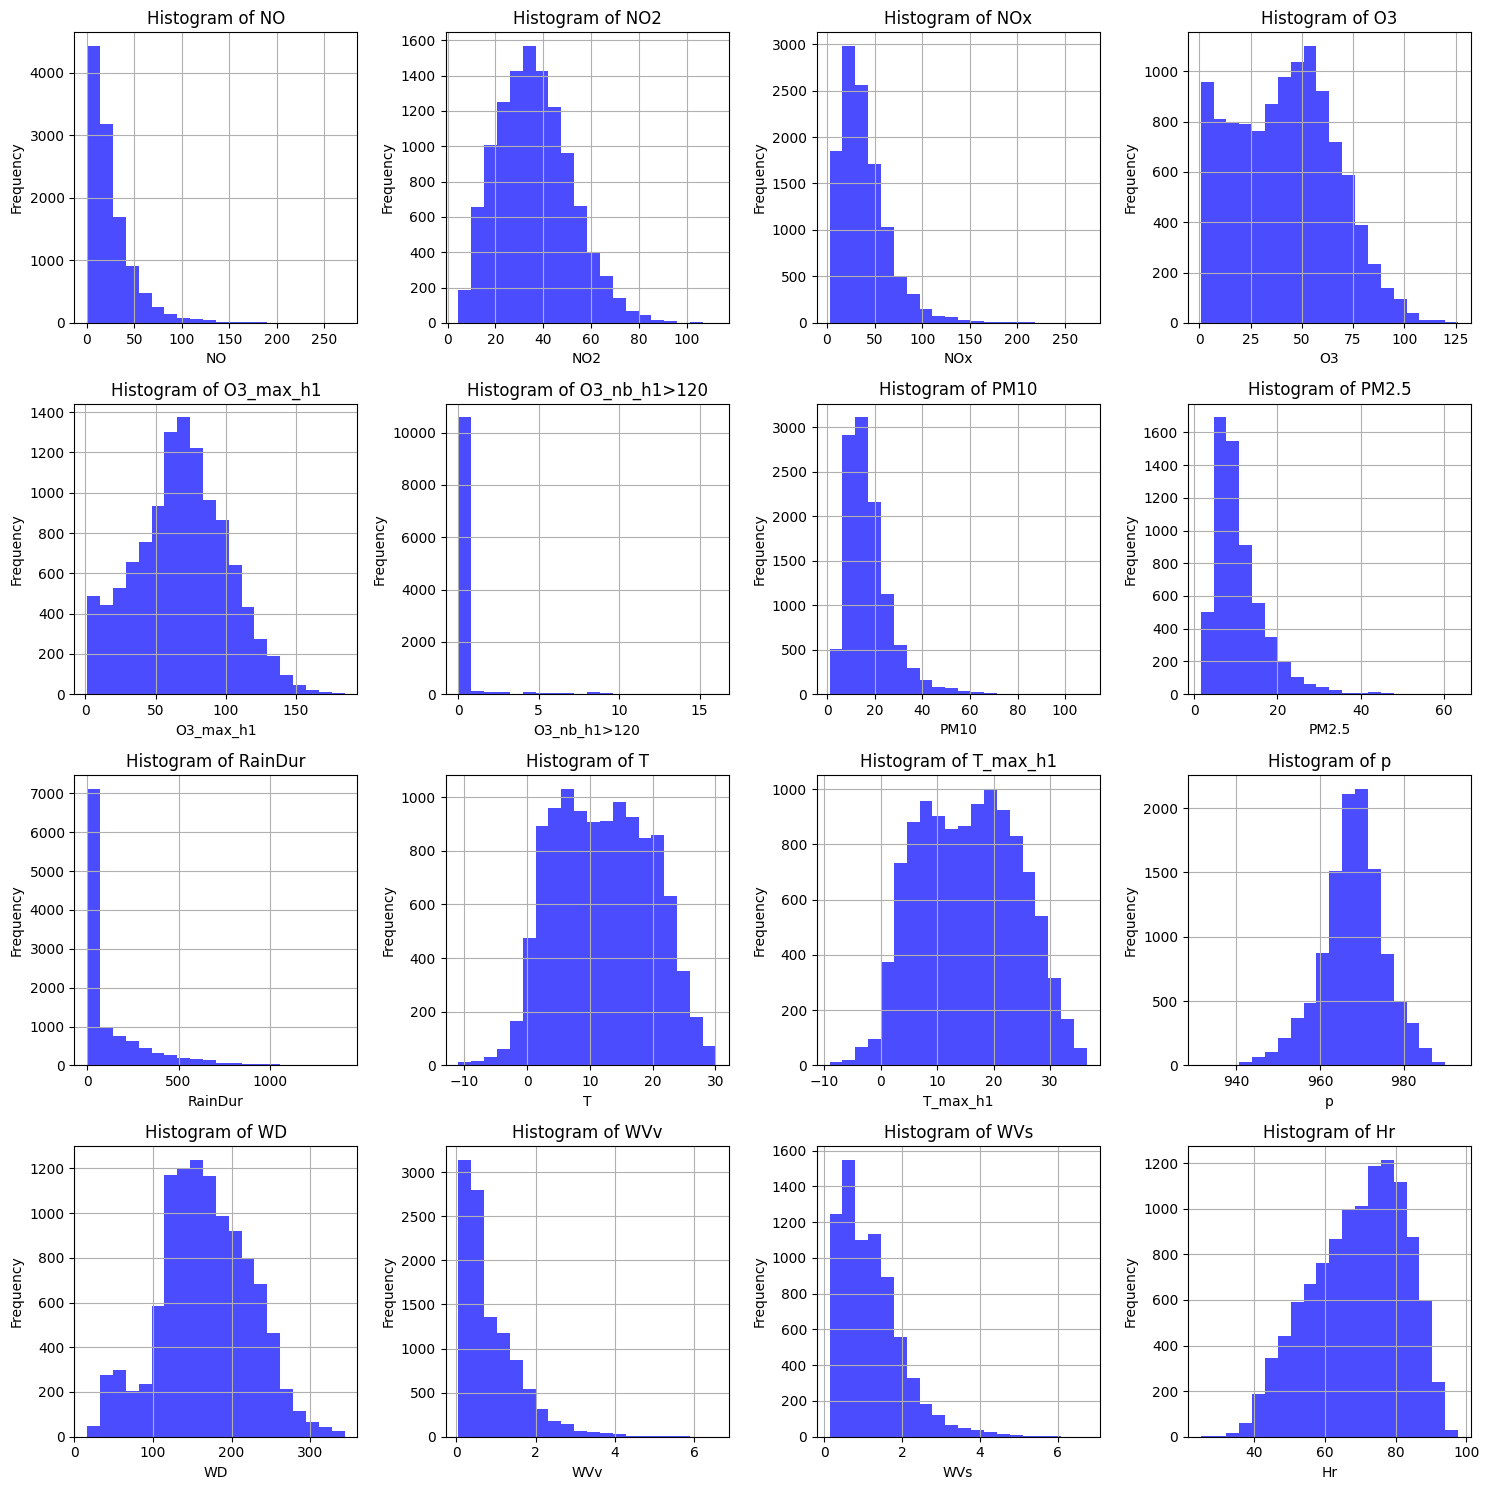

In [9]:
import matplotlib.pyplot as plt

# Columns with missing values
columns_with_missing_values = [
    "NO", "NO2", "NOx", "O3", "O3_max_h1", "O3_nb_h1>120", "PM10", "PM2.5",
    "RainDur", "T", "T_max_h1", "p", "WD", "WVv", "WVs", "Hr"
]

# Create a 4x4 subplot grid
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms for columns with missing values
for i, column_name in enumerate(columns_with_missing_values):
    axes[i].hist(df[column_name].dropna(), bins=20, color='blue', alpha=0.7)
    axes[i].set_title(f'Histogram of {column_name}')
    axes[i].set_xlabel(column_name)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


We observe that for bascially all of the histograms there is a central tendency. This means that the probability of the missing values being around the mean is very high, which means that we can simply use the mean to fill in these missing values.

If the data was dispersed as in the histogram below, using the mean would lead to distorted results

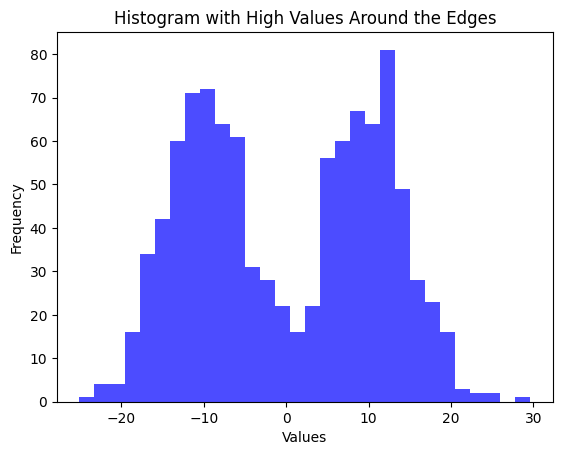

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a dataset with high values around the edges
data = np.concatenate([np.random.normal(loc=-10, scale=5, size=500),
                       np.random.normal(loc=10, scale=5, size=500)])

# Create a histogram
plt.hist(data, bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with High Values Around the Edges')

# Show the plot
plt.show()


In [12]:
# Count occurrences of each unique value in the "RainDur" column
raindur_counts = df['RainDur'].value_counts()

# Print the counts
print(raindur_counts)


RainDur
0.00      4738
0.02        35
0.03        30
0.07        26
0.05        25
          ... 
297.27       1
47.27        1
126.65       1
53.97        1
83.83        1
Name: count, Length: 5467, dtype: int64
